In [1]:
import sys
sys.path.insert(0, "/afs/ir/users/c/j/cjbillov/.local/lib/python2.7/site-packages")
sys.path.append('/afs/ir/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/util')
print sys.path
import lasagne
print lasagne.__version__

from data_utils import get_CIFAR10_data

!export THEANO_FLAGS='floatX=float32'


['/afs/ir/users/c/j/cjbillov/.local/lib/python2.7/site-packages', '', '/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/lib/python2.7', '/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/lib/python2.7/plat-x86_64-linux-gnu', '/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/lib/python2.7/lib-tk', '/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/lib/python2.7/lib-old', '/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/local/lib/python2.7/site-packages', '/afs/ir/users/c/j/cjbillov/.local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages',

In [2]:
# Autoencoder

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import theano
import theano.tensor as T
from theano import pp
import time

import lasagne
from lasagne.layers import InputLayer, DenseLayer, DropoutLayer, InverseLayer

from lasagne.utils import floatX
from lasagne.updates import adam
from lasagne.nonlinearities import softmax



/afs/ir.stanford.edu/users/c/j/cjbillov/cs231n/project/CS231N-FinalProject/.env/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = np.array( np.random.random((1024, 128)), dtype=np.float32)

img_data = get_CIFAR10_data()

In [4]:
# for k, v in img_data.iteritems():
#   print '%s: ' % k, v.shape

X_val = img_data['X_val']
X_val = np.array( X_val.reshape((1000, -1)), dtype=np.float32)
print X_val.shape
data = X_val
y = data 

(1000, 3072)


In [6]:
# Make lasagne layers

input_var = T.matrix('inputs')
target_var = T.matrix('targets')

net = {}
net['input'] = InputLayer ((None, 3072), input_var=input_var)
net['h1'] = DenseLayer(net['input'], num_units=2048, nonlinearity=lasagne.nonlinearities.tanh,
                                       W=lasagne.init.HeNormal(gain=1.0) )
net['h2'] = DenseLayer(net['h1'], num_units=1024, nonlinearity=lasagne.nonlinearities.tanh, 
                                       W=lasagne.init.HeNormal(gain=1.0) )

net['h2_inv'] = InverseLayer(net['h2'], net['h2'])
net['h1_inv'] = InverseLayer(net['h2_inv'], net['h1'])

# l1 = InputLayer((None, 784))
# l2 = DenseLayer(l1, num_units=500, nonlinearity=lasagne.nonlinearities.rectify, )
# l3 = InverseLayer(l2, l2)



In [7]:
params = lasagne.layers.get_all_params(net['h1_inv'], trainable=True)
out = lasagne.layers.get_output(net['h1_inv'], deterministic=True)

loss = lasagne.objectives.squared_error(out, target_var)
adam_update = adam (loss.mean(), params)

train_function = theano.function([input_var, target_var], loss, updates=adam_update)

In [8]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    """
    Get minibatch for data.
    :param inputs:
    :param targets:
    :param batchsize:
    :param shuffle:
    :return:
    """
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [9]:
def train(x=data, y=data, num_epochs=20):
    batch_size = 100
    print x.dtype
    print y.dtype
    print("Starting training...")
    # We iterate over epochs:
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_err = 0.0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(x, y, batch_size, shuffle=True):
            inputs, targets = batch
            train_function(inputs, targets)
            train_batches += 1
        print 'epoch {0} done in time {1}'.format(epoch, time.time() - start_time)
    
    

In [10]:
train(data, y)

float32
float32
Starting training...
epoch 0 done in time 14.7442781925
epoch 1 done in time 15.1257050037
epoch 2 done in time 13.2625701427
epoch 3 done in time 12.0186049938
epoch 4 done in time 12.0549578667
epoch 5 done in time 12.2607388496
epoch 6 done in time 12.4661750793
epoch 7 done in time 12.5525012016
epoch 8 done in time 12.1301431656
epoch 9 done in time 12.0302050114
epoch 10 done in time 12.4466159344
epoch 11 done in time 12.30458498
epoch 12 done in time 12.5594470501
epoch 13 done in time 12.1133518219
epoch 14 done in time 12.2237100601
epoch 15 done in time 12.6072170734
epoch 16 done in time 12.3730401993
epoch 17 done in time 12.166875124
epoch 18 done in time 12.1947100163
epoch 19 done in time 12.3435759544


In [11]:
param_values = lasagne.layers.get_all_param_values(net['h1_inv'])
W1, b1, W2, b2 = param_values
print W1.shape, W2.shape

(3072, 2048) (2048, 1024)


In [12]:
compressed = np.array(lasagne.layers.get_output(net['h1_inv'], data, deterministic=True).eval())


In [13]:
compressed = compressed.reshape((1000, 3, 32, 32))
print compressed.shape

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

(1000, 3, 32, 32)


(3, 32, 32)
(1000, 32, 32, 3)


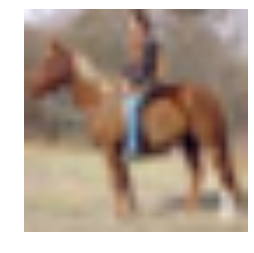

In [18]:
%matplotlib inline
print compressed[0].shape


normed_data = data.reshape((1000, 3, 32, 32))
normed_data = np.transpose(normed_data, (0, 2, 3, 1))
print normed_data.shape

# #imshow_noax(compressed[0])
imshow_noax(normed_data[10])
#imshow_noax(np.transpose(compressed[0], (1, 2, 0)))

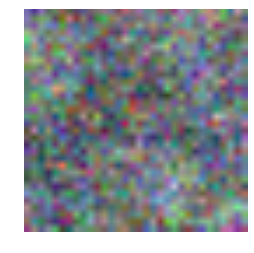

In [19]:
imshow_noax(np.transpose(compressed[10], (1, 2, 0)))